In [42]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[ 73 127]
 [126  75]
 [ 23 185]
 [ 33 247]
 [ 44 142]
 [ 71 153]
 [163  41]
 [138  60]
 [ 23  61]
 [159  30]
 [107 153]
 [  5   6]
 [ 33 157]
 [196 129]
 [ 95  93]
 [108  99]
 [221   6]
 [  2 347]
 [ 55 196]
 [ 64  57]
 [ 45 229]
 [ 56 245]
 [ 13  77]
 [ 70  38]
 [ 39  72]
 [ 50  53]
 [316 105]
 [105  12]
 [189  64]
 [ 91  74]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


In [43]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,73,127,0
1,126,75,0
2,23,185,0
3,33,247,0
4,44,142,0


In [44]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,73,127,Kelas B
1,126,75,Kelas B
2,23,185,Kelas B
3,33,247,Kelas B
4,44,142,Kelas B


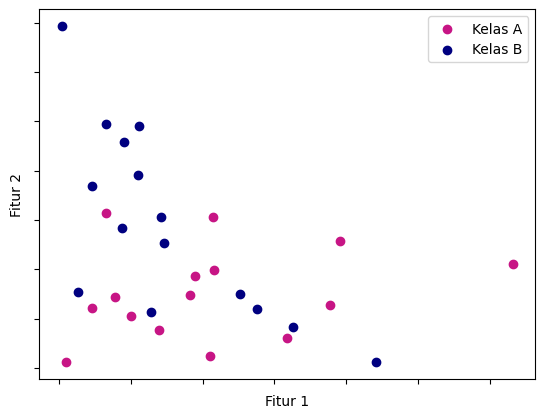

In [45]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [47]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7619047619047619
Hasil akurasi data test (Gaussian): 0.7777777777777778


In [48]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.7619047619047619
Hasil akurasi data test (Gaussian): 0.7777777777777778
